<a href="https://colab.research.google.com/github/oluwamark/compx310/blob/main/Lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Matthew Christensen 1631625 Lab 4

https://colab.research.google.com/drive/1aIe64wPa6jTwbPz3_TliMAjX26Cm8wXB?usp=sharing

###Part 1a

In [ ]:
# https://www.geeksforgeforgeeks.org/machine-learning/gaussian-naive-bayes/
# https://www.geeksforgeeks.org/python/stochastic-gradient-descent-classifier/
# https://www.geeksforgeeks.org/machine-learning/cross-validation-machine-learning/
# https://www.geeksforgeeks.org/machine-learning/auc-roc-curve/
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB

id = 1631625

url = "https://raw.githubusercontent.com/bpfa/data_for_compx310_2023/main/wisconsin_breast_cancer.csv"
bc = pd.read_csv(url)
# remove incomplete samples, remove id column
bc = bc.dropna()
bc = bc.drop('id', axis=1)

# splitting into features and class
X = bc.drop('class', axis=1)
y = bc['class']

Xtrain, Xtest, ytrain, ytest = train_test_split(X,y,test_size=0.2, random_state=id, stratify=y)

# Create an SGD classifier, get 10-fold valiation
sgd_clf = SGDClassifier(random_state=id)

# Create a GaussianDB classifier, get 10-fold validation
gnb_clf = GaussianNB()

# get decision scores/probability value
y_sgd_score = cross_val_predict(sgd_clf, Xtrain, ytrain, cv=10,method="decision_function")
y_gnb_score = cross_val_predict(gnb_clf, Xtrain, ytrain, cv=10,method="predict_proba")

# get model predictions
sgd_pred = cross_val_predict(sgd_clf, Xtest, ytest, cv=10)
gnb_pred = cross_val_predict(gnb_clf, Xtest, ytest, cv=10)

###Part 1b

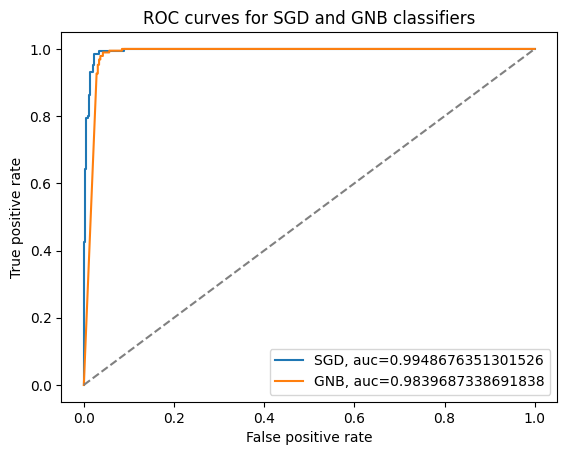

GNB auc score= 0.9839687338691838
SGD auc score= 0.9948676351301526


In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# generate data for roc curves
fpr_sgd, tpr_sgd, thresholds_sgd = roc_curve(ytrain, y_sgd_score)
fpr_gnb, tpr_gnb, thresholds_gnb = roc_curve(ytrain, y_gnb_score[:, 1]) # Select probabilities for the positive class (column 2)

# plot roc curves with pyplot
plt.plot(fpr_sgd,tpr_sgd)
plt.plot(fpr_gnb,tpr_gnb)

# get values for chart legend
GNB_auc_score = roc_auc_score(ytrain, y_gnb_score[:, 1])
SGD_auc_score = roc_auc_score(ytrain, y_sgd_score)

# add chart labels and a legend which includes Area under ROC curve (aoc) scores
plt.legend([f"SGD, auc={SGD_auc_score}",f"GNB, auc={GNB_auc_score}"])
plt.plot([0,1],[0,1],"--",color='grey')
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.title("ROC curves for SGD and GNB classifiers")
plt.show()

# print auc scores
print("GNB auc score=",GNB_auc_score)
print("SGD auc score=",SGD_auc_score)

###Part 1c

In [ ]:
print("GNB Cross validation scores:")
for i in range(9):
  print(cross_val_score(gnb_clf, Xtrain, ytrain, cv=10)[i])

print("\nSGD Cross validation scores:")
for i in range(9):
  print(cross_val_score(sgd_clf, Xtrain, ytrain, cv=10)[i])

GNB Cross validation scores:
0.9818181818181818
0.9818181818181818
0.9272727272727272
0.9272727272727272
0.9636363636363636
1.0
0.9629629629629629
0.9814814814814815
0.9814814814814815

SGD Cross validation scores:
0.9636363636363636
0.9818181818181818
0.9636363636363636
0.9818181818181818
0.9636363636363636
1.0
0.9814814814814815
0.9629629629629629
0.9629629629629629


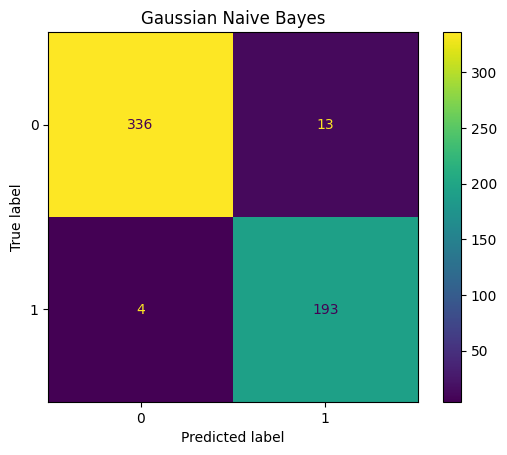

              precision    recall  f1-score   support

           0       0.99      0.96      0.97       355
           1       0.93      0.98      0.95       191

    accuracy                           0.97       546
   macro avg       0.96      0.97      0.96       546
weighted avg       0.97      0.97      0.97       546



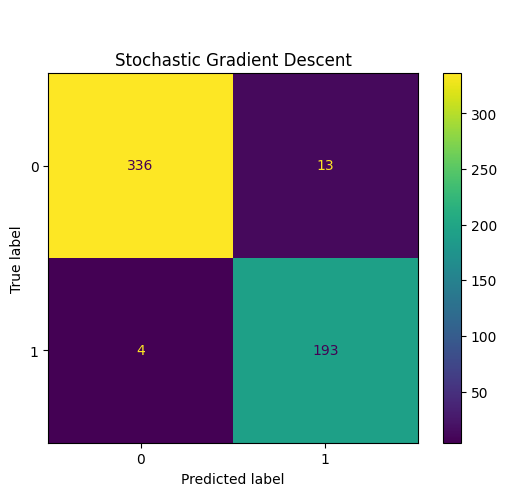

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       355
           1       0.96      0.96      0.96       191

    accuracy                           0.97       546
   macro avg       0.97      0.97      0.97       546
weighted avg       0.97      0.97      0.97       546



In [ ]:
import sklearn.metrics as skmetric

y_gnb_pred = cross_val_predict(gnb_clf, Xtrain, ytrain, cv=10)

cm_gnb = skmetric.confusion_matrix(ytrain,  y_gnb_pred, labels=[0,1])
disp_gnb = skmetric.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])
disp_gnb.plot()
plt.title("Gaussian Naive Bayes")
plt.show()
print(skmetric.classification_report(ytrain,  y_gnb_pred))

y_sgd_pred = cross_val_predict(sgd_clf, Xtrain, ytrain, cv=10)

cm_sgd = skmetric.confusion_matrix(ytrain,  y_sgd_pred, labels=[0,1])
disp_sgd = skmetric.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])
disp_sgd.plot()
plt.title("\n\nStochastic Gradient Descent")
plt.show()
print(skmetric.classification_report(ytrain,  y_sgd_pred))

###Part 1d

In [ ]:
from sklearn.metrics import accuracy_score

# train models on full training dataset, make predictions
sgd_clf.fit(Xtrain, ytrain)
sgd_pred2 = sgd_clf.predict(Xtest)

gnb_clf.fit(Xtrain, ytrain)
gnb_pred2 = gnb_clf.predict(Xtest)

# get area under roc curves for each model
GNB_auc_full = roc_auc_score(ytest,sgd_pred2)
SGD_auc_full = roc_auc_score(ytest,gnb_pred2)

# print results
print(f'SGD model accuracy = {accuracy_score(ytest,sgd_pred2)}')
print(f'SGD auc = {SGD_auc_full}\n')

print(f'GNB model accuracy = {accuracy_score(ytest,gnb_pred2)}')
print(f'GNB auc = {GNB_auc_full}')

SGD model accuracy = 0.9635036496350365
SGD auc = 0.9502574906367041

GNB model accuracy = 0.9416058394160584
GNB auc = 0.9719101123595505


###Part 1 Discussion

In [ ]:
from prettytable import PrettyTable

# specify the column names while initializing the yable
table = PrettyTable(["Training data", "Model type", "AUC", "Model accuracy"])

# constructing and display the 'prettytable'
table.add_row(["Full", "SGD", SGD_auc_full, accuracy_score(ytest,sgd_pred2)])
table.add_row(["Full", "GNB", GNB_auc_full, accuracy_score(ytest,gnb_pred2)])
table.add_row(["10-fold cross validation", "SGD", SGD_auc_score, accuracy_score(ytest,sgd_pred)])
table.add_row(["10-fold cross validation", "GNB", GNB_auc_score, accuracy_score(ytest,gnb_pred)])
print(table)

print("\nSGD model")
print(skmetric.classification_report(ytest,sgd_pred2))
print("\nGNB model")
print(skmetric.classification_report(ytest,gnb_pred2))

+--------------------------+------------+--------------------+--------------------+
|      Training data       | Model type |        AUC         |   Model accuracy   |
+--------------------------+------------+--------------------+--------------------+
|           Full           |    SGD     | 0.9502574906367041 | 0.9635036496350365 |
|           Full           |    GNB     | 0.9719101123595505 | 0.9416058394160584 |
| 10-fold cross validation |    SGD     | 0.9948676351301526 | 0.9416058394160584 |
| 10-fold cross validation |    GNB     | 0.9839687338691838 | 0.9416058394160584 |
+--------------------------+------------+--------------------+--------------------+

SGD model
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        89
           1       0.91      1.00      0.95        48

    accuracy                           0.96       137
   macro avg       0.95      0.97      0.96       137
weighted avg       0.97      0.96      0.96  

The models trained on the full training set have notably smaller AUC values than the models trained with cross-validation.

**Is the classifier with the better AUC value also the more accurate classifier?** When trained with cross-validation, both models had an equal accuracy score. When trained on the full dataset, the model with the higher AUC actually had the lower model accuracy: The SGD model trained on the full dataset had an AUC=0.9503 and accuracy=0.9635 while the GNB model had AUC=0.9719 and accuracy=0.9416.

**Looking at the precision and recall values, what conclusions can you draw?** [Precision](https://www.geeksforgeeks.org/machine-learning/precision-and-recall-in-machine-learning/) tells us what percentage of the model's positive predictions were actually correct. Recall tells us how good the model is at finding all the true positives. In the context of cancer diagnosis, high recall is the most important of the two metrics because the consquences of a false negative diagnosis are significant.

The results of the classification reports (on the cross-validation models) indicate that the GNB model should be the preferred model for use in breast cancer diagnosis. The GNB classification report indicates that the GNB model has a recall of 0.98 for class 1 (true positive cancer diagnosis), which is better than the SGD model's recall of 0.96 for class 1. Both models share a weighted average precision score of 0.97 and a weighted average recall score of 0.97. These similarities are reflected in the accuracy scores of the cross-validation-trained models; both 0.9416.

Looking at the classification reports on the full training data models, the results reverse, indicating that the SGD model with perfect recall for class 1(1.0) would be the preferred model for use in breast cancer diagnosis. This SGD model also hs higher precision than the GNB model - 0.91 vs 0.87 for class 1.

**Which of the two classifiers would you prefer, and why?**
I would prefer the stochastic gradient descent model because it offers better recall for Class 1 and higher accuracy when tested on unseen data. Even in the models trained with cross-validation, the SGD model had equal weighted average values for precision and recall as the GNB model.

###Part 2a

I am going to use the stochastic gradient descent model for this section

Model accuracy on Minnesota data:  0.985
Model accuracy on Melbourne data:  0.93 



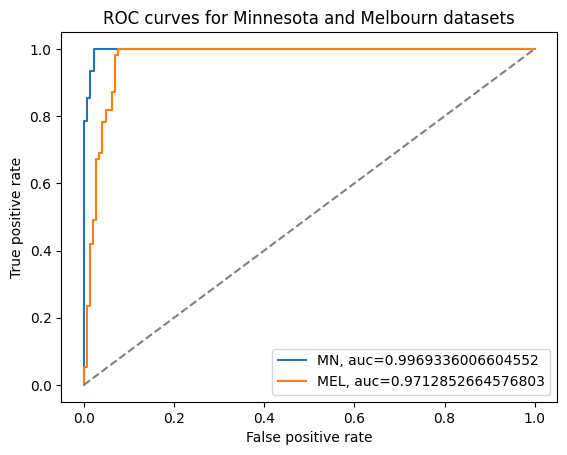

In [ ]:
MN = pd.read_csv("https://raw.githubusercontent.com/nlim-uow/my_notes/main/test_dataset_minnesota.csv")
MEL = pd.read_csv("https://raw.githubusercontent.com/nlim-uow/my_notes/main/test_dataset_melbourne.csv")
#MN
# has same features as wisconsin breast cancer dataset

# remove incomplete samples (missing feature values)
MN = MN.dropna()
MEL = MEL.dropna()

# split datasets into class and features
Xmn=MN.drop(['id','class'], axis=1)
ymn=MN['class']

Xmel=MEL.drop(['id','class'], axis=1)
ymel=MEL['class']
#Xmn.shape,ymn.shape,Xmel.shape,ymel.shape

# fit on full original data (I am taking this to mean the entire wisconsin breast cancer dataset)
clf_2 = SGDClassifier(random_state=id)
clf_2.fit(X,y)

# get scores and predictions
MN_score = clf_2.decision_function(Xmn)
MEL_score = clf_2.decision_function(Xmel)

MN_pred = MN_score>0
MEL_pred = MEL_score>0

# get model accuracy scores
MN_accuracy = accuracy_score(ymn, MN_pred)
MEL_accuracy = accuracy_score(ymel, MEL_pred)

print("Model accuracy on Minnesota data: ",MN_accuracy)
print("Model accuracy on Melbourne data: ",MEL_accuracy,'\n')

# get data for ROC curves
fpr_mn, tpr_mn, thresholds_mn = roc_curve(ymn, MN_score)
fpr_mel, tpr_mel, thresholds_mel = roc_curve(ymel, MEL_score)

# get auc scores
MN_auc = roc_auc_score(ymn, MN_score)
MEL_auc = roc_auc_score(ymel, MEL_score)

# plot the ROC curves
plt.plot(fpr_mn,tpr_mn)
plt.plot(fpr_mel,tpr_mel)

plt.legend([f"MN, auc={MN_auc}",f"MEL, auc={MEL_auc}"])
plt.plot([0,1],[0,1],"--",color='grey')
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.title("ROC curves for Minnesota and Melbourn datasets")
plt.show()


###Part 2 Discussion

We can see that the model has markedly better performance when applied to the Minnesota dataset compared to the Melbourne dataset. One reason for this may be due to the locations fro, which each dataset was collected. Wisconsin (location of data from part 1) and Minnesota are much closer geographically than Wisconsin and Melbourne.

The file names "test_dataset_minnesota.csv" and "test_dataset_melbourne.csv" suggest that they are only a subset of the full Minnesota and Melbourne datasets, in which case they may not represent their local populations accurately. If the train/test splits which resulted in the test datasets did not include stratification, this would further complicate results.

To help the model generalise better to other datasets, you could only include significant features. Of course, you would have correctly determine which features are most significant, but this would reduce overfitting and in turn help the model to generalise to other datasets.